## _Hello folks_ ,

 This is my first submition to kaggles community. In this notebook I will perform some basic machile learning algorithms using scikit learn and try <br> to develope a solution for the legendary titanic challenge.
 
 To solve the challenge I will display the available informations to take insights from it. To organize it
 at the bottom of every investigation there will be observations and conclusions.

# <font color=blue>***IMPORTS***</font>

Import the pertinent

In [1]:
#Data viz and maths
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import math
from random import randint , choice
import scipy.stats as ss

#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

#Metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
TRAIN_FILE = '/Users/netof/Desktop/PROGRAMING/PYTHON/DATA SCIENCE/DATA SETS/titanic/train.csv'
TEST_FILE = '/Users/netof/Desktop/PROGRAMING/PYTHON/DATA SCIENCE/DATA SETS/titanic/test.csv'
GENDER = '/Users/netof/Desktop/PROGRAMING/PYTHON/DATA SCIENCE/DATA SETS/titanic/gender_submission.csv'

## <font color=blue>***DATA***</font>
Gather the information from KAGGLE as a Pandas DataFrame.

In [3]:
sub_path = '/Users/netof/Desktop/PROGRAMING/PYTHON/DATA SCIENCE'
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)
gender_df = pd.read_csv(GENDER)

In [4]:
print('\033[1m' + 'DF Training data set from Titanic info : ')
print(' ')
train_df

DF Training data set from Titanic info : 
 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
print('\033[1m' + 'DF Test data set from Titanic info : ')
print(' ')
test_df

DF Test data set from Titanic info : 
 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## <font color=darkred>***SOLVING THE PUZZLE***</font>

## Questioning (????)
***
 __QUESTION OF THE CHALLENGE__ : 

<font color=darkred>__Create a model that can predict a binary output__.</font> <br>
    _In oder lines, <br>
    Define if this passenger was or not killed in the titanic disaster._
    
***
 
__HOW TO CRACK THE PROBLEM :__

    Use the provided information about the passengers to create a model that predicts
    if a passenger was or not killed in the disaster. 
***
    
   1. <font color=blue>***Explore and Adjust***</font>
        
        
        The goal here is to explore the influence of each feature of a passenger in Titanic with the survivability
        of this passengers. That means to study each characteristic of a passenger and calculate its influence on 
        the  chance of surviving. I will list every feature and try to figure out how to transform that data 
        into more readable information for the model.
        There may be incompatibility between the data (missing values, duplicated values, outliners, diferent 
        measures) that will need to be treated.
        
       
         
***
   2. <font color=green>***Modeling***</font>
        
        
         After dealing with all the features, gather them back into a dataframe. If there are discrepants types of 
         informations, create diferent training dataframes ( DF for groupped features, DF for numerical features)
         Import statistical models from scikit learn. To deal with this challange, focous on the categorical model  
         Model data through all the statistical models and compare the accuracy between then.       

  
***     
   3. <font color=red>***Conclusion***</font>
   
         Potatoo
         
         
         
         
         

# <font color=blue>***Explore and Adjust***</font>

<br>

Trough data exploration I want to display and understand the nuances of the information in the dataset. <br>
Check the correlation of the parameteres to get hints if they mutualy influence each other or if some of 
them are droppable.

Adjusting the data means to transform the features "measures" to be more easy for the model to understand it.Its like digesting the data to the model feed on it.



In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 <font color=purple>***_OBSERVATIONS_ :***</font>

<br>


   __"Pclass"__
    
    Indicates the Passenger Class. As the rich are always over the poor, the passenger class  will definitely 
    have influence on the Survivor chance.
 

   __"NAMES"__
    
     Indicates the Full Name from the passengers. There are titles related to each name. Group
     the passenger's titles to create a new feature that may be more meaningfull then the name of the passengers.
     
   __"SEX"__
     
     Its a binary information, will be easy to treat. The woman had priority to board the safety boats so it is
     also an important information.
     
   __"AGE"__
    
     A lot of missing values, will need caution to fill the gaps here. Necessary to check how the age influence
     on the chance of surviving. 
     
   __"SibSp / Parch"__
     
     Siblings and Spouses / Parents and children. Categorical information to define if a passenger had a family or 
     a spouse onboard.
    
    
   __"TICKETS,CABINS AND FARE"__
    
    There are missing values in 'Cabin'
    Tickets feature must have high relation with Cabin , Fare and Embark and possibly with the passenger Id -
    If the passengerIDs were given in sequence to the passengers as they board.
 
    
   __"EMBARKED"__
    
    Presents the ports where the passenger boarded.Two ports in England and One port in France.
    
    
   <font color=navy>__"SURVIVORS"__</font>
    
    The target feature must have a closer look. This information is crucial. Understanding the survivors
    characteristics is the main knowledge a model needs. From now on I will focus to explore the survivors 
    characteristics and how they influence the Survived output.
    
***
   
    
    

## <font color=navy>***Exploring the Survivors***</font>

Presenting the Survivors features and correlations. Notes about it when needed.

The objective in this sessions is to explore how each feature impacts the surviving chance of a passenger,
so it can be transformed to fit the model better.

In [9]:
survivors_df = train_df[train_df['Survived'] == 1]
survivors_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
## Adquiring information by repeating the same code about the passengers.
# survivors_df['Fare'].std()  ## .mean() .median()
# survivors_df['Parch'].value_counts()

__Survivors characteristics.__


Survived:     342     (38%)<br>
Died :        549     (62%)<br>

**'Sex'<br>
female        233 (68%)<br>
male          109 (32%)**<br>
 
'Embarked'<br>
S             217 (63%) <br>
C             93  (27%)<br>
Q             30  (11%)


**'Pclass'       
1             136 (40%)<br>
3             119 (34%)<br>
2              87 (26%)**


'Age'<bR>
mean :        28.34<br>
median :      28.0<br>
std :         14.95

 
**'Fare'<br>
mean:         48.39<br>
median :      26<br>
std :         66.59**


'Sib/Sp'

0             210 (61%)<br>
1             112 (32%)<br>
2              13  (3%)


**'Parch'<br>
0             233 (68%) <br>
1              65 (19%) <br>
2              40 (11%)**
 


<font color=purple>***_OBSERVATIONS_ :***</font>
    
    
   - Looking to this percentages - terrible displayed, I notice that the output ('Survived') changes drasticly inside
       the features. A change in the passenger class can provide a 20% bonus chance of surviving. Embarking in some
       expecific port contribuits for the chance of surviving too. Its to soon to take conclusion about this
       but it is clear that this features have indeed a strong influence in the survivor rate. 
   
   - Features name,age and fare must be transformed to provide better information.At this moments they dont tell me
       anything about how they relate with the 'Survived' target. Study them depper to extract info.
   
    
    
    
    

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

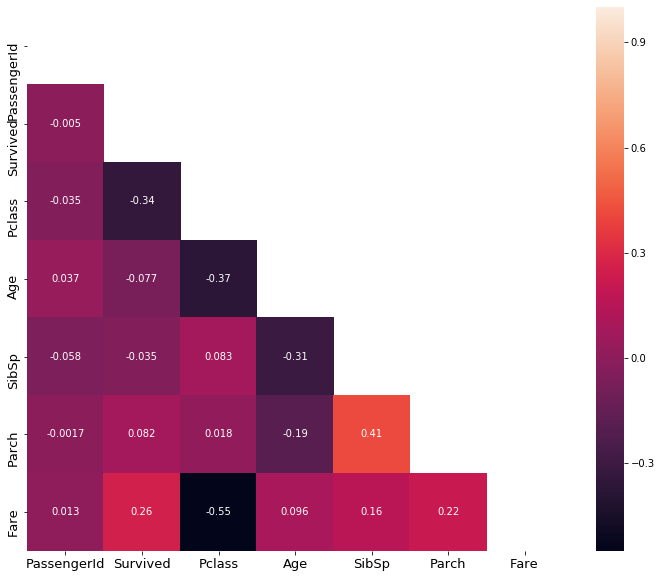

In [11]:
#display a heatmap with the corr() between crude features.

mask = np.zeros_like(train_df.corr()) ## create a mask
triang_selection = np.triu_indices_from(mask) ## set it to show only the down triang.
mask[triang_selection] = True
plt.figure(figsize=(12,10))
sns.heatmap(data= train_df.corr(), mask = mask, annot = True , annot_kws= {'size' : 10}) ## set mask, plot annotations
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

 <font color=purple>***_OBSERVATIONS_ :***</font>
 
 
   - To correctly use the heatmap its necessary to have some __data cleaning__ in the dataset, 
       so the parameters for comparisson would be harmonical. Through this early correlation map 
       it is possible to instant realize that the passenger class and the survivor rate
       are conected. This information gives me a direction to start exploring this data. 
       <br>
    
   - Observing the heatmap, there are direct information about the correlation of features. Observing the missing
       features and some incoerence in the correlations (based on the knowlegde of the titanic records) its also
       possible to aquire crucial information.
       
      <br>
   
   - To go deeper in the investigation each feature must have its own study. Afterwards, gathering again the
       transformed information will be easier to understand. Studying each of the features individualy will also
       help to understand the provile of the titanics survivors.
***
   

### <font color=navy>***Fare***</font>
_How can the $ paid for Ticket impact the chances of surviving?_

<br>


In [12]:
fare = train_df['Fare']


In [13]:
fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(0, 500)

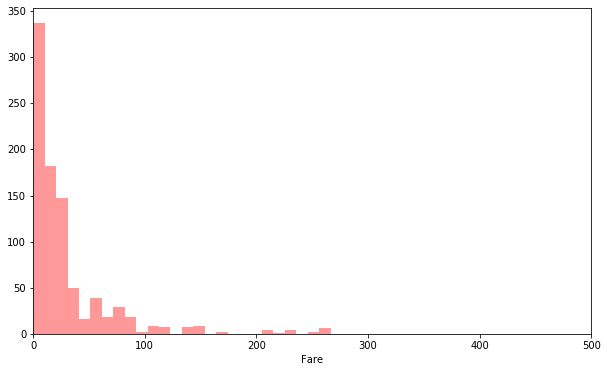

In [14]:
# ammount of passengers that bought the ticket for a certain price
plt.figure(figsize=(10,6))
ax1 = sns.distplot(fare , color = 'red',kde = False,bins = 50)
plt.xlim(0, 500)

(0, 100)

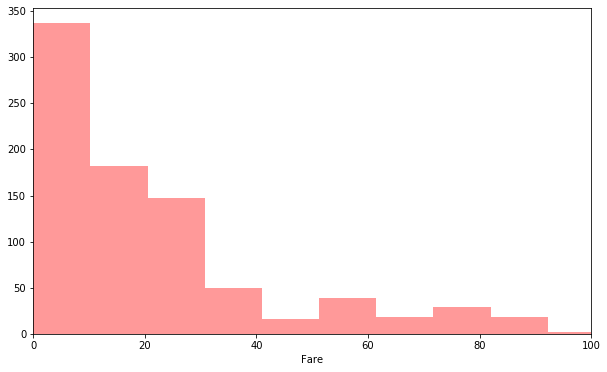

In [15]:
# closer look
fare = train_df['Fare']
plt.figure(figsize=(10,6))
ax1 = sns.distplot(fare , color = 'red',kde = False,bins = 50)
plt.xlim(0,100)

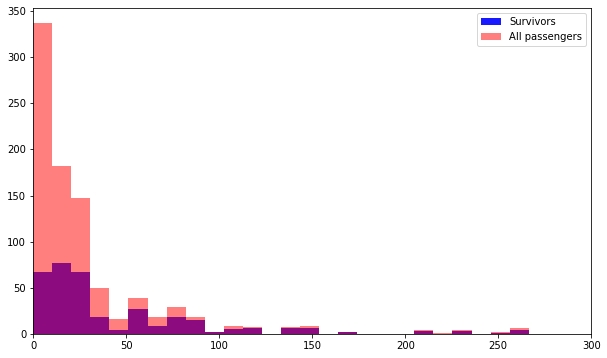

In [16]:
bins = 50 
plt.figure(figsize=(10,6))
plt.hist(survivors_df['Fare'], bins, alpha=0.9, label='Survivors',color = 'blue')
plt.hist(train_df['Fare'], bins, alpha=0.5, label='All passengers',color= 'red')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.show()

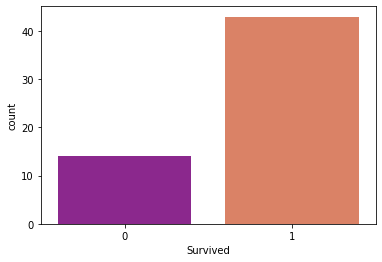

In [17]:

sns.countplot(train_df[train_df['Fare'] > 90.204]['Survived'],palette='plasma')

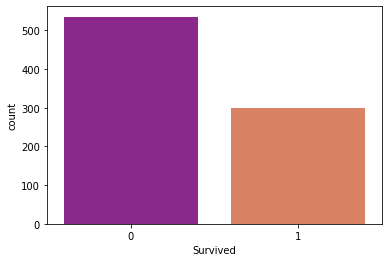

In [18]:
sns.countplot(train_df[train_df['Fare'] < 90.204]['Survived'],palette='plasma')

<font color=purple>***_OBSERVATIONS_ :***</font>

- The % of passengers who survived increasses as the fare increasses too . Over printing the graphs for (survivorscount X fare and allpassengers count X fare , shows that __there is some differences in the representability of the survivors among the total in some spots__. From the graph its possible to catch that:<br>

     ~ There is a higher survivability rate for those who Fare is greater then 90.  <BR>
     ~ The representability of the survivors is the worst in Fare less then 10
     


- Fare's biggest representaion components range 0 - 30.00

- The Fare was way bigger in the C port and so was the survivor rate. The passengers who embarked in frace (port C) paid more money and also had a higher chance of surviving.To explain this, I supose people who paid more for the ticket also had more money, and so enjoyed a privillege at the safe boarding time.
<br>




### _Fare Transformation_


Information to group the Fare: Survivability (%) for Fare


**FARE < 20  (27%)  <br>
0    372 <br>
1    143 <br>**

FARE < 30  (31%)<br>
0    452 <br>
1    207 <br>


**FARE > 40  (64%) <br>
1    113 <br>
0     62<br>**

FARE > 50  (68%) <br>
1    109 <br>
0     51 <br>

**FARE >100 (73%) <br>
1    39 <br>
0    14**<bR>


<font color=purple>***_OBSERVATIONS_ :***</font>

- __Characterization :__

   **1.supercheap fare (0 - 10) <br>
     2.regular fare (11 - 79)<br>
     3.high fare (over 80)**

In [19]:
fare_group_list = []
for i in range (891):
    
    t = train_df['Fare'][i]     
    
    if t <= 10.00 :
        fare_group_list.insert(i,1)
    elif 10<t<=79 :
        fare_group_list.insert(i,2)
           
    else:
        fare_group_list.insert(i,3)
    
train_df['fare_group'] = pd.Series(fare_group_list)

In [20]:
train_df[train_df['fare_group'] == 2]['Survived'].value_counts()

#1 - 20%
#2 - 44%
#3 - 76%

0    260
1    212
Name: Survived, dtype: int64

***

### <font color=navy>***Age***</font>
_How old a passenger is interferes in the surviving chance?_




In [21]:
age_pct = train_df['Age'].count()/891
age_pct 


0.8013468013468014

In [22]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
fare_group       0
dtype: int64

In [23]:
age = survivors_df['Age']
age.describe()

# Save the mean / std / median  before the number insection


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

/Users/netof/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


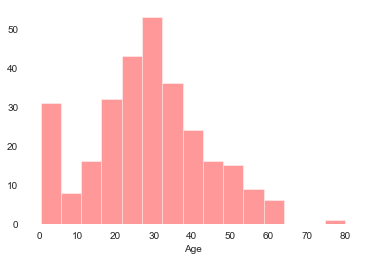

In [24]:
sns.set_style('white')
ax = sns.distplot(age, bins=15, kde = False, color= 'red')
sns.despine(ax=ax, bottom=True, left=True)


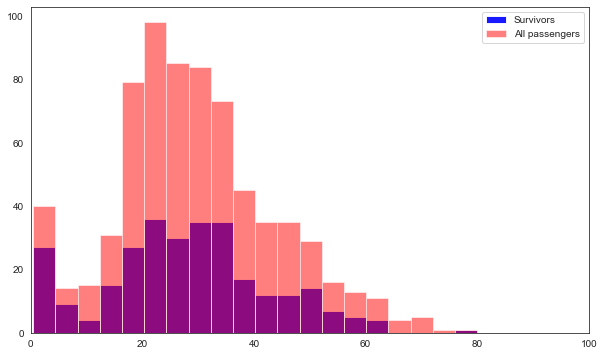

In [25]:
bins = 20
plt.figure(figsize=(10,6))
plt.hist(survivors_df['Age'], bins, alpha=0.9, label='Survivors',color = 'blue')
plt.hist(train_df['Age'], bins, alpha=0.5, label='All passengers',color= 'red')
plt.legend(loc='upper right')
plt.xlim(0,100)
plt.show()

In [26]:
age.value_counts().head(20)

24.0    15
36.0    11
35.0    11
27.0    11
22.0    11
30.0    10
19.0     9
32.0     9
18.0     9
29.0     8
31.0     8
28.0     7
4.0      7
34.0     6
42.0     6
26.0     6
40.0     6
16.0     6
25.0     6
48.0     6
Name: Age, dtype: int64

Information to analyse the missing ages passenger's profile:



**Sex: <br>
male      124 <br>
female     53**<br>

Pclass: <br>
3    136<br>
1     30<br>
2     11<br>
  

**Survived: <br>
0    125 <br>
1     52**<br>


 <font color=purple>***_OBSERVATIONS_ :***</font>

-  There are a lot of missing age values (20% of total) and they must be replaced with solid values, otherwise it will mischaracterize the samples. The Embark feature has a lot influence in the survivor classification as well.

- The age values must keep its relations with the other features so the filled values of age wont create false correlation with the other parameters. (it would corrupt the model, for example : A 1st class male survivor  with 28 years would be uncomun, but a 60 wouldnt)
<br>


- Comparing the [Sex, Pclass and Survived] features to create a good profile to the missing value of ages.

  
 

- **Missing Age's profile**

    Mainly 3 class (80%) <BR>
    Maily dead  (70%) <BR>
    Maily male (70%) <BR></font>

Now its possible to evaluate the age of the other passengers who fit this profile and have a good estimator.

In [27]:
male  = train_df[train_df['Sex'] == 'male']
male_pclass = male[male['Pclass'] == 3]
male_pclass_dead = male_pclass[male_pclass['Survived'] == 0]
male_pclass_dead.dropna()['Age'].std() ##.mean() .median()



# Age median : 25.0
# Age mean : 27.25
# Std : 11.93

11.930353445448855

In [28]:
male_pclass_dead[male_pclass_dead['Age'] >= 50].count()

#Only 3.4% of the age values in the selected profile have a age greater than the upper limit of the std.

PassengerId    10
Survived       10
Pclass         10
Name           10
Sex            10
Age            10
SibSp          10
Parch          10
Ticket         10
Fare           10
Cabin           0
Embarked       10
fare_group     10
dtype: int64

In [29]:
#Create a age_list with the std deviation upper and lower limits and the mean as center of the sample. 
#Randomly pick numbers and insert in the missing values.


age_list = [randint(13,39) for i in range(0,177)]
for i in range(len(train_df['Age'])-1):
    
    if math.isnan(train_df['Age'][i]) :
        
        train_df['Age'][i] = choice(age_list)
    

train_df['Age'] = train_df['Age']
    
    
            

/Users/netof/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
train_df['Age'].describe()

count    891.000000
mean      28.789192
std       13.527210
min        0.420000
25%       20.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Comparing the results of the  mean, std and meadian with the original age values, we see a little skew to the right in the countplot, the value seems reasonable and the influence of filling 177 year values (22% of them) is expected to influence the original mean, median and std.

In [31]:
# train_df_bol = train_df['Age'].between(30, 40, inclusive=False)
# train_df['Survived'][train_df_bol].value_counts()

# train_df[train_df['Age'] >=50]['Survived'].value_counts()

### _Age Transformation_

Information to define the groups : Survivability (%) among the Years



**AGE < 5    (70%)** <br>

1    31 <br>
0    13<br>

AGE < 10     (60%)** <br>
1    38<br>
0    26<br>

**AGE < 15 (51%)<br>
1    52 <br>
0    47 <br>

AGE < 20      (41%) <br>
0    133 <br>
1     94 <br>

**20 < AGE < 30 (36%) <br>
0    170<br>
1     96** <br>
 
#30 < AGE < 40 (38%) <br>
0    124  <br>
1     79 <br>


**20 < AGE < 50  (37%)<br>
0    369 <br>
1    221** <br>

AGE >  50      (36%) <br>
 
0    47 <br>
1    27 <br>


 <font color=purple>***_OBSERVATIONS_ :***</font>

**Groups :**
         - 1.Baby <5
         - 2.Kid <t<15
         - 3.Grown > 16
        
        
The babies < 5 YO have a super high living change, so they will be pout togheter. The kidos < 16 also
have greater living chances and from the age 16 to over 50 the death rate stays close.

In [32]:
age_group_list = []
for i in range (891):
    
    t = train_df['Age'][i]     
    
    if t <= 5 :
        age_group_list.insert(i,1)
        
    elif 5 <  t <=15  :
        age_group_list.insert(i,2)
        
    else:
        age_group_list.insert(i,3)
    
train_df['age_group'] = pd.Series(age_group_list)

***

### <font color=navy>***Embarked***</font>
_How does the Port of Embark affects the chance of living?_



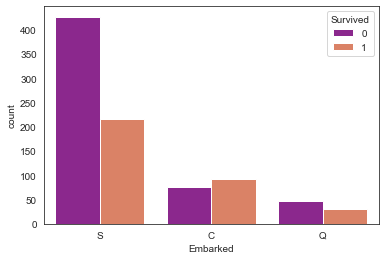

In [33]:
sns.countplot(train_df['Embarked'], hue = train_df['Survived'],palette='plasma')

/Users/netof/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


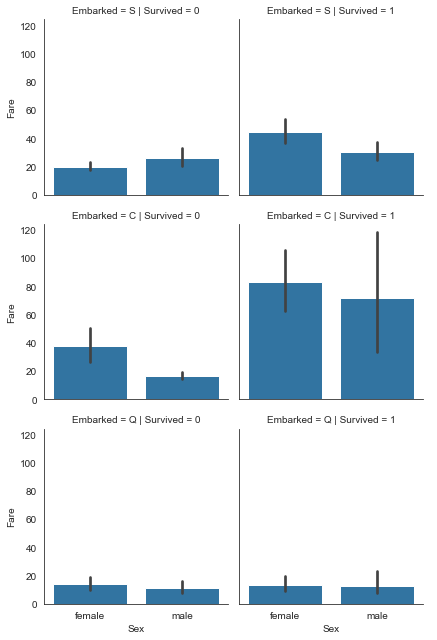

In [34]:
## Display the relations between the port the passenger embarked, the fare and count the survivors
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

S survivors = 217 (33%)
C survivors = 93 (55%)
Q survivors = 30 (38%)


<font color=purple>***_OBSERVATIONS_ :***</font>




- The passengers who board in C port have paid greater fees than the other passengers. That can implicate they have more money, titles and thats why they have more chance to survive. The passengers that board in this port had greater survivability, so its possible to set a new group

### _Embarked  transformation_

Information to clasify the Embark : Survivability (%) among Ports


**S  34%** 

C  55%

**Q  38%**


<font color=purple>***_OBSERVATIONS_ :***</font>

- As the S and Q ports have almost the same survivability, they need to get groupped togheter. To divide the SQ pair and the C port I choose to separate them by the location.

   **1.French <br>
     2.English**

In [35]:
embark_group_list = []
for i in range (891):
    
    t = train_df['Embarked'][i]     
    
    if t == 'C' :
        embark_group_list.insert(i,1)
           
    else:
        embark_group_list.insert(i,2)
    
train_df['embark_group'] = pd.Series(embark_group_list)

***

### <font color=navy>***Passenger Class***</font>
_Being in a higher class influence the chance of surviving?_

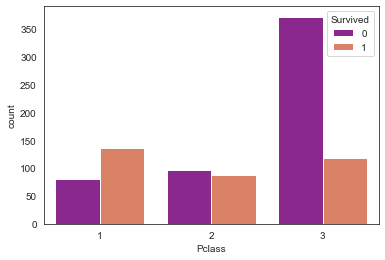

In [36]:
sns.countplot(train_df['Pclass'],hue=train_df['Survived'],palette='plasma')

In [37]:
train_df[train_df['Pclass'] == 3]['Survived'].value_counts()


0    372
1    119
Name: Survived, dtype: int64

Information to classify Pclass : Survivability(%) for each pclass:
        
<br>

**First Class <br>
1    136  (62%)<br>
0     80  (38%)**

Second Class <br>
0    87   (47%)<br>
1    97   (53%)

**Third Class<br>
1    119  (24%)<br>
0    372  (76%)**


 <font color=purple>***_OBSERVATIONS_ :***</font>

- Checking the percentage of death rate by the passenger class shows that the passengers from the first class was grester
than the second class. The third class passengers had the worst survivability of all. This feature by itself already
classificates the survivors by the numbers 1,2 and 3. No data transformation needed.

***

### <font color=navy>***Names***</font>
_How the name of a passenger defines its chance of surviving?_


In [38]:
train_df['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

 <font color=purple>***_OBSERVATIONS_ :***</font>

- Aparrently extracting the good info about this feature means to study the title attached with each name. The propper names of the passengers will not provide any solid information. To check if the death rates are higher or lower in each title on the other hand, can be productive.

In [39]:
# Create a list and append the tag for each title inside it.
title_list = []


for i in range(891):
    
    
    f_name = train_df['Name'][i].split(',')[1]
    f_title = f_name.split('.')[0].strip()
    
    title_list.append(f_title)

train_df['Title'] = pd.Series(title_list)



In [40]:
# count of the title of the survivors
title_survivor_counts = train_df[train_df['Survived'] == 1]['Title'].value_counts()
title_survivor_counts

Miss            127
Mrs              99
Mr               81
Master           23
Dr                3
Mlle              2
Col               1
Sir               1
Ms                1
the Countess      1
Mme               1
Major             1
Lady              1
Name: Title, dtype: int64

In [41]:
# count of all passengers
title_counts = train_df['Title'].value_counts()
title_counts

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Lady              1
the Countess      1
Mme               1
Don               1
Capt              1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

### Title Transformation

 <font color=purple>***_OBSERVATIONS_ :***</font>

- Checking the percentage of death rate by every title to group correctly the groups. As I am trying to create better
    features to predict if a passenger was not killed, its necessary to group the features to "serve" the output. 
    In  this case to check which title had the greater number of deads.The titles that have less apearances can 
    overfit the model.
<br>

- Militar,dr and rev can be grouped togheter, as they have similar death rates. also they can be categorical classifi
    cated as they represent crucial entities in societ : the army, the church and the health system. masters will be
    included in this group also because of his death rate.Another group to be formed belong to the the MR. poor man 
    were all killed. only 15% survived. they deserve they own group.The ladies will form the third group, as they 
    have higher chances of surviving .The other group belong to the nobility with almost no deaths.
 <br>

**Groups :**
         - 1.Militar/Dr/Rev/Master 
         - 2.Mr 
         - 3.Mrs/Miss 
         - 4.Nobility

In [42]:
# The same procedure to create a new column .Creat a list, populate it and then serve it to the DF

title_group_list = []
for i in range (891):
    
    t = train_df['Title'][i]        

    if t == 'Dr' or t == 'Rev' or t == 'Master' or t == 'Major' or t == 'Col'  or t == 'Capt' :
        title_group_list.insert(i,3)
    elif t == 'Mr' :
        title_group_list.insert(i,4)
        
    elif t == 'Miss' or t == 'Mrs': 
        title_group_list.insert(i,2)
        
    else:
        title_group_list.insert(i,1)
    
train_df['title_group'] = pd.Series(title_group_list)




***

### <font color=navy>***SibSp/Parch***</font>
_Is the chance of surviving affected by the fact a passenger has family onboard?_


Sibs onboard :
0    151
1    132

No Sibs:
0    398
1    210



Parch onboard:

1    109
0    104

No Parch:

0    445
1    233

In [43]:
train_df[train_df['SibSp'] == 0]['Survived'].value_counts()

0    398
1    210
Name: Survived, dtype: int64

In [44]:
train_df[train_df['Parch'] == 0]['Survived'].value_counts()

0    445
1    233
Name: Survived, dtype: int64

The 'Parch' and 'SibSp' features can be better classified. To have a good binary predictor it is preferible to have
binary features. Both this features indicates a familiar relation and its possible to convert to binary by transforming this two features :


        Siblings/Spouses      ->    Couple

        Parents/Children)     ->    Family
   
As the safe boats in Titanic were getting filled with people, to have a family would highly have an influence in the chance of survivor. 
es


In [45]:

train_df['Parch'].replace(2,1, inplace = True)
train_df['Parch'].replace(3,1, inplace = True)
train_df['Parch'].replace(4,1, inplace = True)
train_df['Parch'].replace(5,1, inplace = True)
train_df['Parch'].replace(6,1, inplace = True)
train_df.rename(columns={"Parch": "Family"},inplace= True)

train_df['SibSp'].replace(2,1, inplace = True)
train_df['SibSp'].replace(4,1, inplace = True)
train_df['SibSp'].replace(3,1, inplace = True)
train_df['SibSp'].replace(8,1, inplace = True)
train_df['SibSp'].replace(5,1, inplace = True)
train_df.rename(columns={"SibSp": "Married"},inplace= True)

 ## <font color=green>***Modeling***</font>

###  <font color=darkgreen>***Drop Features and Get Dummies***</font> 

At this moment its necessary to deal with other features that are not easily adaptatives to the model. 
Cabin and Ticket number may have some influence, but the lack of information on the cabin column and the irrelevance
of the ticket number makes it easier to drop this features. If some boosting is needed for the model accuracy, it is
possible to come back to this features and try to extract some more acc juice.

In [46]:
train_df = pd.get_dummies(train_df.drop(['Title','Cabin','Ticket','Name'],axis =1 ))
train_df.drop('Sex_male', axis=1 , inplace = True)

In [47]:
train_df

,PassengerId,Survived,Pclass,Age,Married,Family,Fare,fare_group,age_group,embark_group,title_group,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,3,2,4,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,3,1,2,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,3,2,2,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,3,2,2,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,3,2,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,2,3,2,3,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,2,3,2,2,1,0,0,1
888,889,0,3,18.0,1,1,23.4500,2,3,2,2,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,2,3,1,4,0,1,0,0


### <font color=darkgreen>***Seting the TEST DF***</font>
_How the name of a passenger defines its chance of surviving?_



The same data processing needs to be done with the test dataset, so we can perform the model over it.

In [48]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
## FARE GROUP

fare_group_list = []
for i in range (418):
    
    t = test_df['Fare'][i]     
    
    if t <= 50.00 :
        fare_group_list.insert(i,1)
           
    else:
        fare_group_list.insert(i,2)
    
test_df['fare_group'] = pd.Series(fare_group_list)



In [50]:
## AGE GROUP

age_group_list = []
for i in range (418):
    
    t = test_df['Age'][i]     
    
    if t <= 5 :
        age_group_list.insert(i,1)
        
    elif 5 <  t <=15  :
        age_group_list.insert(i,2)
        
    else:
        age_group_list.insert(i,3)
    
test_df['age_group'] = pd.Series(age_group_list)

In [51]:
## EMBARK GROUP
embark_group_list = []
for i in range (418):
    
    t = test_df['Embarked'][i]     
    
    if t == 'C' :
        embark_group_list.insert(i,1)
           
    else:
        embark_group_list.insert(i,2)
    
test_df['embark_group'] = pd.Series(embark_group_list)


In [52]:
## Titles GROUP

title_list = []


for i in range(418):
    
    
    f_name = test_df['Name'][i].split(',')[1]
    f_title = f_name.split('.')[0].strip()
    
    title_list.append(f_title)

test_df['Title'] = pd.Series(title_list)

In [53]:
title_group_list = []
for i in range (418):
    
    t = test_df['Title'][i]        

    if t == 'Dr' or t == 'Rev' or t == 'Master' or t == 'Major' or t == 'Col'  or t == 'Capt' :
        title_group_list.insert(i,3)
    elif t == 'Mr' :
        title_group_list.insert(i,4)
        
    elif t == 'Miss' or t == 'Mrs': 
        title_group_list.insert(i,2)
        
    else:
        title_group_list.insert(i,1)
    
test_df['title_group'] = pd.Series(title_group_list)


In [54]:
test_df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Ticket', axis = 1, inplace = True)
test_df.drop('Name', axis = 1 , inplace = True)
test_df = pd.get_dummies(test_df.drop('Title',axis =1 ))
test_df.drop('Sex_male', axis=1 , inplace = True)
test_df['Parch'].replace(2,1, inplace = True)
test_df['Parch'].replace(3,1, inplace = True)
test_df['Parch'].replace(4,1, inplace = True)
test_df['Parch'].replace(5,1, inplace = True)
test_df['Parch'].replace(6,1, inplace = True)
test_df.rename(columns={"Parch": "Family"},inplace= True)
test_df['SibSp'].value_counts()
test_df['SibSp'].replace(2,1, inplace = True)
test_df['SibSp'].replace(4,1, inplace = True)
test_df['SibSp'].replace(3,1, inplace = True)
test_df['SibSp'].replace(8,1, inplace = True)
test_df['SibSp'].replace(5,1, inplace = True)
test_df.rename(columns={"SibSp": "Married"},inplace= True)

In [55]:
# DROP THE NAN AGES
test_df['Age'].fillna(test_df['Age'].mean(), inplace= True)

In [56]:
test_df[test_df['Fare'].isna() == True]
## pasenger ID 1044 must be dropped from gender_df

,PassengerId,Pclass,Age,Married,Family,Fare,fare_group,age_group,embark_group,title_group,Sex_female,Embarked_C,Embarked_Q,Embarked_S
152,1044,3,60.5,0,0,NaN,2,3,2,4,0,0,0,1


In [65]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace= True)

In [66]:
test_df = test_df.merge(gender_df)

###  <font color=darkgreen>***Gather Train/Test df***</font>  


Group the features into training and testing DF.  I will put the groupped features into one DF and the regular
features into other DF and them perform the model over them.

In [67]:
group_train_df = train_df.drop(['Age','Embarked_C','Embarked_Q','Embarked_S'],axis=1)
group_test_df = test_df.drop(['Age','Embarked_C','Embarked_Q','Embarked_S'],axis=1)
                            

In [68]:
group_train_df.drop('Fare',axis =1 , inplace= True)
group_test_df.drop('Fare',axis = 1, inplace = True)

In [69]:
reg_train_df = train_df.drop(['embark_group','fare_group','age_group','title_group'],axis=1)
reg_test_df = test_df.drop(['embark_group','fare_group','age_group','title_group'],axis=1)

Using the regular dataframe

###  <font color=darkgreen>***Fit models***</font> 


Fit the models and check their acc


In [70]:
### Groupped DF

gp_train_feat = group_train_df.drop('Survived', axis = 1)
gp_train_tgt = group_train_df['Survived']

gp_test_feat = group_test_df.drop('Survived',axis = 1)
gp_test_tgt = group_test_df['Survived']


### Regular DF

reg_train_feat = reg_train_df.drop('Survived', axis = 1)
reg_train_tgt = reg_train_df['Survived']

reg_test_feat = reg_test_df.drop('Survived', axis =1)
reg_test_tgt = reg_test_df['Survived']

In [71]:
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=2)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
LSVC = LinearSVC()
NSVC = NuSVC()


TypeError: 'SVC' object is not callable

In [72]:
## REGULAR DF

gnb.fit(reg_train_feat, reg_train_tgt)
y2_GNB_model = gnb.predict(reg_test_feat)
print("GaussianNB Accuracy :", accuracy_score(reg_test_tgt, y2_GNB_model))

KNN.fit(reg_train_feat, reg_train_tgt)
y2_KNN_model = KNN.predict(reg_test_feat)
print("KNN Accuracy :", accuracy_score(reg_test_tgt, y2_KNN_model))

BNB.fit(reg_train_feat, reg_train_tgt)
y2_BNB_model = BNB.predict(reg_test_feat)
print("BNB Accuracy :", accuracy_score(reg_test_tgt, y2_BNB_model))

LR.fit(reg_train_feat, reg_train_tgt)
y2_LR_model = LR.predict(reg_test_feat)
print("LR Accuracy :", accuracy_score(reg_test_tgt, y2_LR_model))

SDG.fit(reg_train_feat, reg_train_tgt)
y2_SDG_model = SDG.predict(reg_test_feat)
print("SDG Accuracy :", accuracy_score(reg_test_tgt, y2_SDG_model))

# SVC.fit(reg_train_feat, reg_train_tgt)
# y2_SVC_model = SVC.predict(reg_test_feat)
# print("SVC Accuracy :", accuracy_score(reg_test_tgt, y2_SVC_model))

LSVC.fit(reg_train_feat, reg_train_tgt)
y2_LSVC_model = LSVC.predict(reg_test_feat)
print("LSVC Accuracy :", accuracy_score(reg_test_tgt, y2_LSVC_model))

NSVC.fit(reg_train_feat, reg_train_tgt)
y2_NSVC_model = NSVC.predict(reg_test_feat)
print("NSVC Accuracy :", accuracy_score(reg_test_tgt, y2_NSVC_model))

GaussianNB Accuracy : 0.8301435406698564
KNN Accuracy : 0.6291866028708134
BNB Accuracy : 0.9712918660287081
LR Accuracy : 0.9545454545454546
SDG Accuracy : 0.6722488038277512
LSVC Accuracy : 0.6363636363636364
NSVC Accuracy : 0.6363636363636364


/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
## GROUPPED DF

gnb.fit(gp_train_feat, gp_train_tgt)
y2_GNB_model = gnb.predict(gp_test_feat)
print("GaussianNB Accuracy :", accuracy_score(gp_test_tgt, y2_GNB_model))

KNN.fit(gp_train_feat, gp_train_tgt)
y2_KNN_model = KNN.predict(gp_test_feat)
print("KNN Accuracy :", accuracy_score(gp_test_tgt, y2_KNN_model))

BNB.fit(gp_train_feat, gp_train_tgt)
y2_BNB_model = BNB.predict(gp_test_feat)
print("BNB Accuracy :", accuracy_score(gp_test_tgt, y2_BNB_model))

LR.fit(gp_train_feat, gp_train_tgt)
y2_LR_model = LR.predict(gp_test_feat)
print("LR Accuracy :", accuracy_score(gp_test_tgt, y2_LR_model))

SDG.fit(gp_train_feat, gp_train_tgt)
y2_SDG_model = SDG.predict(gp_test_feat)
print("SDG Accuracy :", accuracy_score(gp_test_tgt, y2_SDG_model))

# SVC.fit(gp_train_feat, gp_train_tgt)
# y2_SVC_model = SVC.predict(reg_test_feat)
# print("SVC Accuracy :", accuracy_score(reg_test_tgt, y2_SVC_model))

LSVC.fit(gp_train_feat, gp_train_tgt)
y2_LSVC_model = LSVC.predict(gp_test_feat)
print("LSVC Accuracy :", accuracy_score(gp_test_tgt, y2_LSVC_model))

NSVC.fit(gp_train_feat, gp_train_tgt)
y2_NSVC_model = NSVC.predict(gp_test_feat)
print("NSVC Accuracy :", accuracy_score(gp_test_tgt, y2_NSVC_model))

GaussianNB Accuracy : 0.9593301435406698
KNN Accuracy : 0.6363636363636364
BNB Accuracy : 1.0
LR Accuracy : 0.9808612440191388
SDG Accuracy : 0.6363636363636364
LSVC Accuracy : 0.6004784688995215
NSVC Accuracy : 0.6363636363636364


/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
print(classification_report(gp_test_tgt, y2_BNB_model))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
         892       0.00      0.00      0.00       1.0
         893       0.00      0.00      0.00       1.0
         894       0.00      0.00      0.00       1.0
         895       0.00      0.00      0.00       1.0
         896       0.00      0.00      0.00       1.0
         897       0.00      0.00      0.00       1.0
         898       0.00      0.00      0.00       1.0
         899       0.00      0.00      0.00       1.0
         900       0.00      0.00      0.00       1.0
         901       0.00      0.00      0.00       1.0
         902       0.00      0.00      0.00       1.0
         903       0.00      0.00      0.00       1.0
         904       0.00      0.00      0.00       1.0
         905       0.00      0.00      0.00       1.0
         906       0.00      0.00      0.00       1.0
         907       0.00    

/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/netof/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [75]:
## create submition DF
# Index 152 must be dropped ( FARE = 0)

test_df[test_df['Fare'].isna() == True]

submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y2_BNB_model})
submission.to_csv('JNSUB' ,index= False)


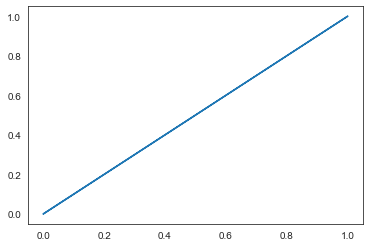

In [82]:
plt.plot(y2_BNB_model,gp_test_tgt)

## <font color=red>***Conclusions :***</font> 

The results were amazing. The BNB, Gaussian NB and LR had the best acc of all the models. With the
BNB model I got 100 % of acc in the test model. That implicates a lot of overfeating in this model.
At this moment its possible to display the correlation heat map to observe how the features trully impact each other

In [ ]:
## Cramer's V corr matrix for categorical features

def cramers_v(confusion_matrix):
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
columns = group_train_df.columns.to_list()
columns.remove('PassengerId')
columns

group_corr = pd.DataFrame(np.zeros_like(group_train_df.corr()))
# group_corr.iloc[0,0]

    
for i in range(len(group_train_df.columns)):
    for j in range(len(group_train_df.columns)):

        k = group_train_df.columns[i]
        l = group_train_df.columns[j]

        confusion_matrix =  pd.crosstab(group_train_df[k], group_train_df[l]).as_matrix()


        group_corr.iloc[i,j] = cramers_v(confusion_matrix)


In [ ]:
corr_matrix = group_corr.iloc[1:,1:]
corr_matrix.columns = columns
corr_matrix.index = columns
mask = np.zeros_like(corr_matrix) ## create a mask
triang_selection = np.triu_indices_from(mask) ## set it to show only the down triang.
mask[triang_selection] = True
plt.figure(figsize=(12,10))
sns.heatmap(data= corr_matrix, mask = mask, annot = True , annot_kws= {'size' : 10}) ## set mask, plot annotations
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)

In [ ]:
corr_matrix['Survived'].sort_values()

In [ ]:
corr_matrix['title_group'].sort_values().tail(3)

In [ ]:
corr_matrix['fare_group'].sort_values().tail(3)

In [ ]:
corr_matrix['Pclass'].sort_values().tail(3)

In [ ]:
corr_matrix['embark_group'].sort_values().tail(3)

In [ ]:
corr_matrix['Family'].sort_values().tail(3)

In [ ]:
corr_matrix['Married'].sort_values().tail(3)

By evaluating the correlation matrix we check that creating a tittle group was the most impacting feature in the model.
Other transformation that shown good correlation with the targeted feature is the fare group.

To conclude this challenge, here it comes the complete description of the features and how they influence on the
chance of surviving the TiTaNiC disaster.

## <font color=red>***FINAL CONCLUSION:***</font> 


__About the Survivors :__

- Most of the Titanic passengers did NOT survive the disaster.

- The passenger who survived the disaster were mainly woman, from the First Classka and spent more money in the ticket

- The tittle given to the passenger as it boards on titanic its the best parameter to say if it survived or not.

__About the Model :__

- To have a good performance it was needed to adjust a lot of features. 

- The results were awesome! The high acc values for the NB models are expected as the feature transformations feed it good

- I fited a good DF into a good model.


__About the learning__

- I learned alot by doing this challenge! A lot of new techs and code lines. Im sure there is mistakes and shit-code, I would love to have some feedback to get better!

- Thanks for your patience, hope you can learn something new too!

